📊 O que já aprendemos sobre Concept Drift

  | Aspecto              | Status | O que vimos                                   |
  |----------------------|--------|-----------------------------------------------|
  | Definição básica     | ✅      | Distribuição dos dados muda ao longo do tempo |
  | Como TEDA lida       | ✅      | Chebyshev test rejeita → novos clusters       |
  | Adaptação automática | ✅      | Clusters novos "aprendem" novos padrões       |
  | Experimento prático  | ✅      | Vimos threshold adaptativo                    |

  ---
  📚 O que falta estudar (teoria)

  | Aspecto            | Importância | Por quê                                                                           |
  |--------------------|-------------|-----------------------------------------------------------------------------------|
  | Tipos de drift     | Alta        | Sudden, gradual, incremental, recorrente - cada um tem características diferentes |
  | Detecção de drift  | Média       | Como saber QUANDO o drift aconteceu (além de criar novos clusters)                |
  | Avaliação          | Alta        | Como medir se o algoritmo lida bem com drift (métricas)                           |
  | Simulação de drift | Alta        | Como criar experimentos que testem drift no CICIoT2023                            |

  ---
  🤔 Duas Abordagens Possíveis

  Opção A: Estudar teoria de concept drift primeiro

  1. Tipos de concept drift (30-60min)
  2. Métodos de detecção (30min)
  3. Métricas de avaliação (30min)
  4. Depois: design da arquitetura com esse conhecimento
  Vantagem: Fundamentação teórica sólida para dissertação
  Desvantagem: Mais tempo antes de implementar

  Opção B: Ir para design e aprender drift conforme necessário

  1. Design da arquitetura agora
  2. Estudar concept drift quando for desenhar experimentos
  3. Aprofundar teoria ao escrever dissertação
  Vantagem: Chega mais rápido na implementação
  Desvantagem: Pode precisar voltar para revisar conceitos

  ---
  💡 Minha Recomendação

  Para dissertação de mestrado, eu sugiro a Opção A - pelo menos uma visão geral dos tipos de drift e como avaliar. Isso vai:

  1. Melhorar o design: Você saberá quais tipos de drift testar
  2. Fortalecer a dissertação: Poderá justificar escolhas com teoria
  3. Evitar retrabalho: Não precisará redesenhar experimentos depois

  Tempo estimado: ~1-2 horas para cobrir o essencial

  ---
  Qual opção você prefere?

> Opcao a 

⏺ ---
  🎓 Concept Drift: Fundamentos Teóricos

  Vamos cobrir o essencial para sua dissertação.

  ---
  1. O que é Concept Drift?

  Definição formal: Mudança na distribuição conjunta P(X, y) ao longo do tempo.

  Em t=0:    P₀(X, y)
  Em t=100:  P₁(X, y) ≠ P₀(X, y)  ← Drift aconteceu!

  No contexto IoT IDS:
  - X = features do tráfego de rede
  - y = classe (normal/ataque)
  - Drift = novos tipos de ataque, mudança no comportamento normal, etc.

  ---
  2. Tipos de Concept Drift

  Existem 4 tipos principais que você precisa conhecer:

  ┌─────────────────────────────────────────────────────────────────┐
  │  TIPOS DE CONCEPT DRIFT                                         │
  │                                                                 │
  │  1. SÚBITO (Sudden/Abrupt)                                      │
  │     ────────────┐                                               │
  │                 │████████████                                   │
  │     Conceito A  │ Conceito B                                    │
  │                 └──────────────────────► tempo                  │
  │                                                                 │
  │  2. GRADUAL                                                     │
  │     ──────────────────────────                                  │
  │        ████  ░░████  ░░░░████                                   │
  │        A     A+B     B                                          │
  │     ──────────────────────────► tempo                           │
  │                                                                 │
  │  3. INCREMENTAL                                                 │
  │     ════════════════════════                                    │
  │     A → A' → A'' → A''' → B                                     │
  │     ════════════════════════► tempo                             │
  │                                                                 │
  │  4. RECORRENTE (Recurring)                                      │
  │     ████    ░░░░    ████    ░░░░                                │
  │       A      B       A       B                                  │
  │     ────────────────────────────► tempo                         │
  └─────────────────────────────────────────────────────────────────┘

  Detalhes de cada tipo:

  | Tipo        | Descrição                                 | Exemplo em IoT IDS                              |
  |-------------|-------------------------------------------|-------------------------------------------------|
  | Súbito      | Mudança abrupta de um conceito para outro | Novo malware lançado (Mirai aparece de repente) |
  | Gradual     | Transição com período de mistura          | Atacantes adaptando técnicas aos poucos         |
  | Incremental | Mudança lenta e contínua                  | Tráfego normal evoluindo com novos dispositivos |
  | Recorrente  | Conceitos que voltam ciclicamente         | Ataques sazonais, padrões dia/noite             |

  ---
  3. Componentes do Drift

  O drift pode afetar diferentes partes da distribuição:

  P(X, y) = P(y) × P(X|y)
            ↑       ↑
       Prior    Likelihood
       drift    drift

  | Componente | Nome Técnico     | O que muda                      | Exemplo                                |
  |------------|------------------|---------------------------------|----------------------------------------|
  | P(y)       | Prior drift      | Proporção das classes           | Mais ataques que antes                 |
  | P(X|y)     | Likelihood drift | Características das classes     | Ataques com novos padrões              |
  | P(X)       | Virtual drift    | Distribuição de X (sem mudar y) | Novos dispositivos IoT                 |
  | P(y|X)     | Real drift       | Fronteira de decisão            | Mesmo tráfego, classificação diferente |

  Para IDS, o mais importante é:
  - Real drift: O que era normal virou ataque (ou vice-versa)
  - Likelihood drift: Ataques com novas características


### Experimento: Visualizar os Tipos de Drift

Vamos criar dados sintéticos para entender cada tipo

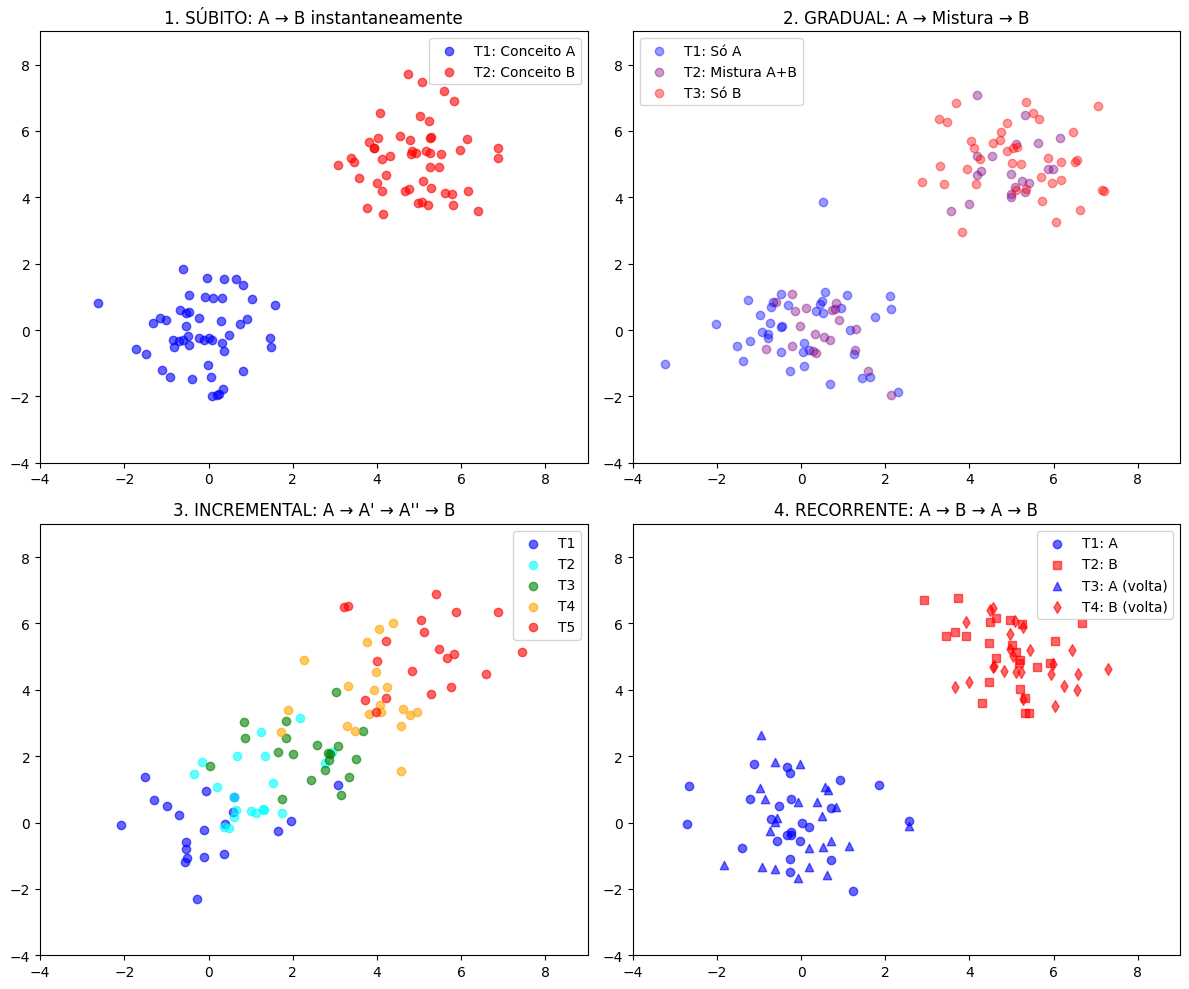

=== TIPOS DE CONCEPT DRIFT ===
1. SÚBITO: Mudança instantânea (ex: novo malware lançado)
2. GRADUAL: Período de transição com mistura (ex: atacantes adaptando)
3. INCREMENTAL: Mudança lenta e contínua (ex: evolução do tráfego normal)
4. RECORRENTE: Padrões que voltam (ex: ataques sazonais)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_concept(center, n_points=100):
    """Gera pontos de um conceito (cluster)"""
    return np.random.randn(n_points, 2) + center

# Conceito A: centro em (0, 0)
# Conceito B: centro em (5, 5)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. SÚBITO: A → B instantaneamente
ax = axes[0, 0]
t1_sudden = generate_concept([0, 0], 50)  # Tempo 1: Conceito A
t2_sudden = generate_concept([5, 5], 50)  # Tempo 2: Conceito B
ax.scatter(t1_sudden[:, 0], t1_sudden[:, 1], c='blue', alpha=0.6, label='T1: Conceito A')
ax.scatter(t2_sudden[:, 0], t2_sudden[:, 1], c='red', alpha=0.6, label='T2: Conceito B')
ax.set_title('1. SÚBITO: A → B instantaneamente')
ax.legend()
ax.set_xlim(-4, 9)
ax.set_ylim(-4, 9)

# 2. GRADUAL: Mistura de A e B por um período
ax = axes[0, 1]
t1_gradual = generate_concept([0, 0], 40)  # Tempo 1: Só A
t2_gradual = np.vstack([generate_concept([0, 0], 20), generate_concept([5, 5], 20)])  # Tempo 2: Mistura
t3_gradual = generate_concept([5, 5], 40)  # Tempo 3: Só B
ax.scatter(t1_gradual[:, 0], t1_gradual[:, 1], c='blue', alpha=0.4, label='T1: Só A')
ax.scatter(t2_gradual[:, 0], t2_gradual[:, 1], c='purple', alpha=0.4, label='T2: Mistura A+B')
ax.scatter(t3_gradual[:, 0], t3_gradual[:, 1], c='red', alpha=0.4, label='T3: Só B')
ax.set_title('2. GRADUAL: A → Mistura → B')
ax.legend()
ax.set_xlim(-4, 9)
ax.set_ylim(-4, 9)

# 3. INCREMENTAL: A → A' → A'' → B (mudança contínua)
ax = axes[1, 0]
centers = [[0, 0], [1.25, 1.25], [2.5, 2.5], [3.75, 3.75], [5, 5]]
colors = ['blue', 'cyan', 'green', 'orange', 'red']
for i, (center, color) in enumerate(zip(centers, colors)):
    points = generate_concept(center, 20)
    ax.scatter(points[:, 0], points[:, 1], c=color, alpha=0.6, label=f'T{i+1}')
ax.set_title('3. INCREMENTAL: A → A\' → A\'\' → B')
ax.legend()
ax.set_xlim(-4, 9)
ax.set_ylim(-4, 9)

# 4. RECORRENTE: A → B → A → B
ax = axes[1, 1]
t1_rec = generate_concept([0, 0], 25)
t2_rec = generate_concept([5, 5], 25)
t3_rec = generate_concept([0, 0], 25)
t4_rec = generate_concept([5, 5], 25)
ax.scatter(t1_rec[:, 0], t1_rec[:, 1], c='blue', alpha=0.6, marker='o', label='T1: A')
ax.scatter(t2_rec[:, 0], t2_rec[:, 1], c='red', alpha=0.6, marker='s', label='T2: B')
ax.scatter(t3_rec[:, 0], t3_rec[:, 1], c='blue', alpha=0.6, marker='^', label='T3: A (volta)')
ax.scatter(t4_rec[:, 0], t4_rec[:, 1], c='red', alpha=0.6, marker='d', label='T4: B (volta)')
ax.set_title('4. RECORRENTE: A → B → A → B')
ax.legend()
ax.set_xlim(-4, 9)
ax.set_ylim(-4, 9)

plt.tight_layout()
plt.show()

print("=== TIPOS DE CONCEPT DRIFT ===")
print("1. SÚBITO: Mudança instantânea (ex: novo malware lançado)")
print("2. GRADUAL: Período de transição com mistura (ex: atacantes adaptando)")
print("3. INCREMENTAL: Mudança lenta e contínua (ex: evolução do tráfego normal)")
print("4. RECORRENTE: Padrões que voltam (ex: ataques sazonais)")

  🧪 Experimento: Simular Drift no CICIoT2023
    Quer ver um exemplo prático de como simular drift nos seus dados reais?

  # Simular drift SÚBITO no CICIoT2023
  # Ideia: Treinar com um tipo de ataque, testar com outro

In [3]:
# Carregar dados
X = np.load('../../iot-ids-research/data/processed/binary/X_train_binary.npy')
y = np.load('../../iot-ids-research/data/processed/binary/y_train_binary.npy')

# Dividir em "fases temporais" (simulando stream)
n_samples = len(X)
phase_size = n_samples // 3

phase1 = slice(0, phase_size)           # Fase 1
phase2 = slice(phase_size, 2*phase_size) # Fase 2 (drift?)
phase3 = slice(2*phase_size, n_samples)  # Fase 3

# Verificar se há diferença entre fases (possível drift natural)
print("=== ANÁLISE DE DRIFT NATURAL NO DATASET ===")
print(f"\nFase 1: {y[phase1].mean():.2%} ataques")
print(f"Fase 2: {y[phase2].mean():.2%} ataques")
print(f"Fase 3: {y[phase3].mean():.2%} ataques")

# Se as proporções mudarem, há prior drift natural!

=== ANÁLISE DE DRIFT NATURAL NO DATASET ===

Fase 1: 97.67% ataques
Fase 2: 97.66% ataques
Fase 3: 97.67% ataques
